### Initialization

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import eyelinkio

### Loading `edf` file with `eyelinkio`

In [11]:
# define path to data
edf_path = '/Users/baharsener/Desktop/TG_2013.edf'

# read edf and print metadata
edf = eyelinkio.read_edf(edf_path)
print(edf)
#thinks it is missing samples? is one eent one file?

loadEvents = 1
Missing 1 samples. Inserting dummy samples 
Missing (10370902-10370905) samples. Calculating speriod 
Missing 1 samples. Inserting dummy samples 
Missing (10377384-10377387) samples. Calculating speriod 
Missing 1 samples. Inserting dummy samples 
Missing (10386660-10386663) samples. Calculating speriod 
Missing 1 samples. Inserting dummy samples 
Missing (10438180-10438183) samples. Calculating speriod 
Missing 1 samples. Inserting dummy samples 
Missing (10438214-10438217) samples. Calculating speriod 
Missing 1 samples. Inserting dummy samples 
Missing (10489438-10489441) samples. Calculating speriod 
Missing 1 samples. Inserting dummy samples 
Missing (10507816-10507819) samples. Calculating speriod 
Missing 1 samples. Inserting dummy samples 
Missing (10524316-10524319) samples. Calculating speriod 
Missing 1 samples. Inserting dummy samples 
Missing (10524838-10524841) samples. Calculating speriod 
Missing 1 samples. Inserting dummy samples 
Missing (10527204-10527

In [13]:
# inpsect structure of edf
edf.keys()

dict_keys(['info', 'discrete', 'times', 'samples'])

### `edf['discrete']`

In [14]:
edf['discrete'].keys()

#edf['discrete']['messages']: time, message
# edf['discrete']['buttons']: time, button
# edf['discrete']['inputs']: time, input

dict_keys(['messages', 'buttons', 'inputs', 'fixations', 'saccades', 'blinks'])

In [15]:
# inspect fixation data structure
edf['discrete']['fixations'][0] # first fixation
# structure: eye (1=left eye), start time, end time, average x, average y

np.void((0.0, 0.052, 0.484, 685.4000244140625, 607.5), dtype=[('eye', '<f8'), ('stime', '<f8'), ('etime', '<f8'), ('axp', '<f8'), ('ayp', '<f8')])

In [16]:
# inspect blink data structure
edf['discrete']['blinks'][0] # first blinkx
# structure: eye (1=left eye), start time, end time

np.void((0.0, 1.164, 1.306), dtype=[('eye', '<f8'), ('stime', '<f8'), ('etime', '<f8')])

In [17]:
# inspect saccade data structure
edf['discrete']['saccades'][0] # first saccade
# structure: eye, start time, end time, gaze start x, gaze start y, gaze end x, gaze end y, peak velocity (unit?)

np.void((0.0, 0.486, 0.508, 697.0, 602.2000122070312, 689.9000244140625, 552.5999755859375, 91.5999984741211), dtype=[('eye', '<f8'), ('stime', '<f8'), ('etime', '<f8'), ('sxp', '<f8'), ('syp', '<f8'), ('exp', '<f8'), ('eyp', '<f8'), ('pv', '<f8')])

### convert `edf` to `pandas` `df`

In [18]:
df = edf.to_pandas()
df.keys()

dict_keys(['discrete', 'samples', 'calibrations'])

In [19]:
df['samples'].head() #x, y, pupil size

,xpos,ypos,ps
0,870.400024,670.000000,576.0
1,870.599976,670.299988,575.0
2,870.599976,670.500000,573.0
3,869.000000,670.299988,572.0
4,865.299988,669.900024,570.0


In [20]:
# edf['samples'] contain all samples that were recorded during the session 
# to prove that:
num_samples = edf['samples'].shape[1]
sample_freq = edf['info']['sfreq']
time = num_samples / sample_freq # time should be close/equal to the duration of the session
print(time, edf['times'][-1])

1297.836 1297.834


In [21]:
df['calibrations']

,point_x,point_y,offset,diff_x,diff_y,eye,model,onset
0,640.0,512.0,1.58,35.1,32.8,left,HV9,0.0
1,640.0,87.0,1.14,-4.4,-42.0,left,HV9,0.0
2,640.0,936.0,0.56,4.5,19.9,left,HV9,0.0
3,77.0,512.0,0.95,22.7,-15.4,left,HV9,0.0
4,1202.0,512.0,0.81,20.7,9.1,left,HV9,0.0
5,144.0,138.0,0.76,20.4,0.1,left,HV9,0.0
6,1135.0,138.0,1.16,26.9,21.9,left,HV9,0.0
7,144.0,885.0,0.91,17.3,23.9,left,HV9,0.0
8,1135.0,885.0,0.48,-11.5,-8.3,left,HV9,0.0


In [22]:
df['discrete']['messages'].head()

,stime,msg
0,0.0,DISPLAY_COORDS 0 0 1279 1023
1,0.0,"!CAL \n>>>>>>> CALIBRATION (HV9,P-CR) FOR LEFT..."
2,0.0,!CAL Calibration points:
3,0.0,"!CAL 10.5, -20.7 2037, 5539"
4,0.0,"!CAL 12.7, -25.0 2304, 9415"


In [23]:
df['discrete']['buttons'].head()

,stime,buttons
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [24]:
df['discrete']['inputs'].head()

,stime,input
0,0.0,127.0
1,0.0,127.0
2,0.0,127.0
3,0.0,127.0
4,0.0,127.0


In [25]:
df['discrete']['fixations'].head()

,eye,stime,etime,axp,ayp
0,LEFT_EYE,0.052,0.484,685.400024,607.500000
1,LEFT_EYE,0.510,0.912,698.700012,559.299988
2,LEFT_EYE,0.942,1.120,649.700012,545.500000
3,LEFT_EYE,1.360,2.394,674.099976,557.599976
4,LEFT_EYE,2.464,2.700,1090.400024,567.299988


In [26]:
df['discrete']['blinks'].head()

,eye,stime,etime
0,LEFT_EYE,1.164,1.306
1,LEFT_EYE,14.412,14.598
2,LEFT_EYE,21.212,21.346
3,LEFT_EYE,22.176,22.234
4,LEFT_EYE,23.530,23.592


In [27]:
df['discrete']['saccades'].head()

,eye,stime,etime,sxp,syp,exp,eyp,pv
0,LEFT_EYE,0.486,0.508,697.000000,602.200012,689.900024,552.599976,91.599998
1,LEFT_EYE,0.914,0.940,704.200012,563.200012,655.799988,541.000000,124.800003
2,LEFT_EYE,1.122,1.358,636.799988,564.599976,678.099976,518.700012,3244.600098
3,LEFT_EYE,2.396,2.462,664.000000,567.599976,1085.099976,570.700012,576.299988
4,LEFT_EYE,2.702,2.740,1088.500000,569.299988,1211.199951,559.200012,221.800003


### example: average data sampled every second and plot hetamap

In [28]:
# data wrangling
data = df['samples'].copy()
data['time'] = edf['times']
data.head()

,xpos,ypos,ps,time
0,870.400024,670.000000,576.0,0.000
1,870.599976,670.299988,575.0,0.002
2,870.599976,670.500000,573.0,0.004
3,869.000000,670.299988,572.0,0.006
4,865.299988,669.900024,570.0,0.008


In [29]:
# convert time to integer to represent each second
data['time_sec'] = data['time'].astype(int) # always rounding down

# group by time_sec and calculate the mean for 'xpos', 'ypos', 'pupil'
data_grouped = data.groupby('time_sec')[['xpos', 'ypos', 'ps']].mean().reset_index()
data_grouped = data_grouped.dropna()
data_grouped.head()

,time_sec,xpos,ypos,ps
0,0,692.708400,582.802199,481.742
1,1,670.877805,581.897897,392.972
2,2,945.399200,559.027999,540.556
3,3,1164.039801,539.959201,468.744
4,4,494.674600,507.432200,500.368


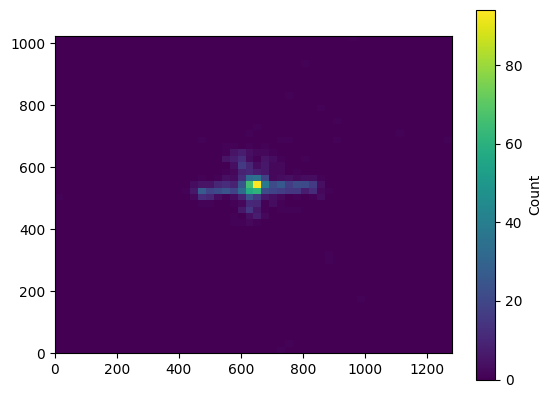

In [30]:
# create 2D array for x and y positions
heatmap, xedges, yedges = np.histogram2d(data_grouped['xpos'], data_grouped['ypos'], bins=50)
screen_coords = edf['info']['screen_coords']

# Plot the heatmap using imshow
plt.imshow(heatmap.T, origin='lower', cmap='viridis',
           extent=[0, screen_coords[0], 0, screen_coords[1]])
plt.colorbar(label='Count')

# note: the heatmap is not corrected with calibration info
#the screen coordinates seem off! My screen is 0,1024 for x and 0, 768 for y! 
#So this looks like is actually fixed in the middle
#But I am not sure how long of a time it is plotting really, is it all?
#it could be given there is a 2 second fixation before e